Importing the libaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer,StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

Reading the data

In [3]:
data = pd.read_csv('Hr_Data.csv')
data = data.set_index('SLNO')

Looking at the data

In [4]:
data

,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
SLNO,,,,,,,,,,,,,,,,,
1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12332,3835433,No,0,30,E1,76.92,53.85,-13.04,No,No,Male,Direct,4,INFRA,Noida,34,Joined
12333,3836076,No,2,0,E1,45.25,14.09,-21.45,No,No,Female,Employee Referral,1,INFRA,Chennai,34,Joined
12319,3822427,No,4,0,E1,191.67,191.67,0.00,No,No,Male,Employee Referral,1,ERS,Chennai,34,Joined


Checking for null values

In [5]:
data.isnull().sum()/data.shape[0]

Candidate.Ref                  0.0
DOJ.Extended                   0.0
Duration.to.accept.offer       0.0
Notice.period                  0.0
Offered.band                   0.0
Pecent.hike.expected.in.CTC    0.0
Percent.hike.offered.in.CTC    0.0
Percent.difference.CTC         0.0
Joining.Bonus                  0.0
Candidate.relocate.actual      0.0
Gender                         0.0
Candidate.Source               0.0
Rex.in.Yrs                     0.0
LOB                            0.0
Location                       0.0
Age                            0.0
Status                         0.0
dtype: float64

Checking for datatypes

In [6]:
data.dtypes

Candidate.Ref                    int64
DOJ.Extended                    object
Duration.to.accept.offer         int64
Notice.period                    int64
Offered.band                    object
Pecent.hike.expected.in.CTC    float64
Percent.hike.offered.in.CTC    float64
Percent.difference.CTC         float64
Joining.Bonus                   object
Candidate.relocate.actual       object
Gender                          object
Candidate.Source                object
Rex.in.Yrs                       int64
LOB                             object
Location                        object
Age                              int64
Status                          object
dtype: object

We check our target variable and see that our data is baised. We got around 5000 rows more than the people who didnt join. This can be improved while creating the data.

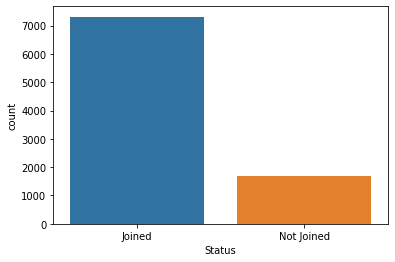

In [7]:
sns.countplot(data['Status'])

These columns have negative value and we need only the positive values for training our model.

In [8]:
data['Percent.difference.CTC'] = data['Percent.difference.CTC'].abs()
data['Pecent.hike.expected.in.CTC'] = data['Pecent.hike.expected.in.CTC'].abs()

We check the range of age column the people who applied in the company.

In [9]:
data.Age.value_counts().sort_index()

20       2
21       3
22      58
23     221
24     397
25     677
26     841
27     907
28     772
29     632
30     575
31     486
32     378
33     298
34    2144
35     168
36     128
37      86
38      63
39      45
40      39
41      18
42      17
43      11
44       6
45       9
46       3
47       2
48       3
49       3
50       4
51       1
60       1
Name: Age, dtype: int64

Converting the age column into bins for fitting in the model. 

In [10]:
data['Age_bins'] = pd.cut(x=data['Age'], bins=[20,25,30,35,40,45,50,55, 60], labels=[1,2,3,4,5,6,7,8],include_lowest=True)

Checking the new Age_bins column created.

In [11]:
data['Age_bins'].value_counts().sort_index()

1    1358
2    3727
3    3474
4     361
5      61
6      15
7       1
8       1
Name: Age_bins, dtype: int64

Converting the target variable into categorical data

In [12]:
def status_to_numeric(x):
        if x=='Joined': return 2
        if x=='Not Joined': return 1
data['Status_num'] = data['Status'].apply(status_to_numeric)
data.head()

,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status,Age_bins,Status_num
SLNO,,,,,,,,,,,,,,,,,,,
1,2110407,Yes,14,30,E2,20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined,3,2
2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined,3,2
3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined,2,2
4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined,3,2
5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined,3,2


We check the range of Year of experience column the people who applied in the company. 

In [13]:
data['Rex.in.Yrs'].value_counts().sort_index()

0      250
1      637
2      963
3     2487
4     1490
5      831
6      795
7      578
8      427
9      205
10     140
11      53
12      45
13      47
14      19
15      14
16       5
17       3
18       1
20       5
22       2
24       1
Name: Rex.in.Yrs, dtype: int64

We also convert the Year of experience into  bins column for better data processing. 

In [14]:
data['Rex.in.Yrs'] = pd.cut(x=data['Rex.in.Yrs'], bins=[0,3,6,9,12,15,18,21,24], labels=[1,2,3,4,5,6,7,8],include_lowest=True)

We drop these columns for reducing data redundancy. 

In [15]:
data.drop(['Candidate.Ref','Status','Age','Pecent.hike.expected.in.CTC'], axis=1,inplace=True)

The columns in the dataframe.

In [16]:
data.columns

Index(['DOJ.Extended', 'Duration.to.accept.offer', 'Notice.period',
       'Offered.band', 'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age_bins',
       'Status_num'],
      dtype='object')

Checking the categorical data in the dataframe.

In [17]:
data.describe(include='object')

,DOJ.Extended,Offered.band,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,LOB,Location
count,8998,8998,8998,8998,8998,8998,8998,8998
unique,2,4,2,2,2,3,9,11
top,No,E1,No,No,Male,Direct,INFRA,Chennai
freq,4790,5570,8581,7708,7447,4803,2850,3151


Converting the catagorical data into numerical label encoders.

In [18]:
le = LabelEncoder()
data['DOJ.Extended'] = le.fit_transform(data['DOJ.Extended'])
data['Offered.band'] = le.fit_transform(data['Offered.band'])
data['Joining.Bonus'] = le.fit_transform(data['Joining.Bonus'])
data['Candidate.relocate.actual'] = le.fit_transform(data['Candidate.relocate.actual'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Candidate.Source'] = le.fit_transform(data['Candidate.Source'])
data['LOB'] = le.fit_transform(data['LOB'])
data['Location'] = le.fit_transform(data['Location'])

Getting the dummies of some categorical column so as to reduce data redundancy.

In [19]:
cat_col = ['DOJ.Extended','Joining.Bonus','Candidate.relocate.actual','Gender', 'Candidate.Source']
data = pd.get_dummies(data, columns=cat_col, drop_first=True)

Standardising the numerical columns to fit in model.

In [20]:
mm = MinMaxScaler()
num_col = ['Duration.to.accept.offer', 'Notice.period','Percent.hike.offered.in.CTC', 'Percent.difference.CTC']
data[num_col] = mm.fit_transform(data[num_col])

Data after preprocessing and feature engineering. 

In [21]:
data

,Duration.to.accept.offer,Notice.period,Offered.band,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,LOB,Location,Age_bins,Status_num,DOJ.Extended_1,Joining.Bonus_1,Candidate.relocate.actual_1,Gender_1,Candidate.Source_1,Candidate.Source_2
SLNO,,,,,,,,,,,,,,,,
1,0.062500,0.250,2,0.138525,0.142867,3,4,8,3,2,1,0,0,0,0,0
2,0.080357,0.250,2,0.715336,0.600000,3,7,2,3,2,0,0,0,1,0,1
3,0.013393,0.375,2,0.194319,0.000000,2,7,8,2,2,0,0,0,1,0,0
4,0.116071,0.250,2,0.194319,0.000000,2,7,8,3,2,0,0,0,1,0,1
5,0.004464,1.000,2,0.193849,0.000000,2,7,8,3,2,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12332,0.000000,0.250,1,0.215016,0.043467,2,7,8,3,2,0,0,0,1,1,0
12333,0.008929,0.000,1,0.140274,0.071500,1,7,2,3,2,0,0,0,0,0,1
12319,0.017857,0.000,1,0.474096,0.000000,1,4,2,3,2,0,0,0,1,0,1


Dividing the dataframe into feature and target variable.

In [22]:
X = data.drop(['Status_num'], axis=1)
y = data[['Status_num']]

Using ravel to convert the target variable into array.

In [23]:
y = y.values.ravel()
y

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

Diving the data into train and test.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

Checking the shape after splitting.

In [25]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7198, 15), (1800, 15), (7198,), (1800,))

Fitting a simple Logistic regression model.

In [26]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print('Train accuracy:',lr.score(X_train,y_train))
print('Test accuracy:',lr.score(X_test,y_test))
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.8173103639899972
Test accuracy: 0.8083333333333333
[[  20  328]
 [  17 1435]]
Accuracy0.8083333333333333


Fitting in a support vector machine algorithm

In [27]:
svc = SVC()
svc.fit(X_train,y_train)
print('Train accuracy:',svc.score(X_train, y_train))
print('Test accuracy:',svc.score(X_test,y_test))
y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

Train accuracy: 0.8146707418727425
Test accuracy: 0.8066666666666666
[[   0  348]
 [   0 1452]]
Accuracy0.8066666666666666


Fitting a random forest classifier

In [28]:
rfr1 = RandomForestClassifier()
rfr1.fit(X_train,y_train)
print('Train accuracy',rfr1.score(X_train,y_train))
print('Test accuracy:',rfr1.score(X_test,y_test))
y_pred = rfr1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

Train accuracy 0.995137538205057
Test accuracy: 0.8194444444444444
[[  65  283]
 [  42 1410]]
Accuracy0.8194444444444444


Fitting a gradient boosting classifier algorithm

In [29]:
gbr = GradientBoostingClassifier(loss='exponential')
gbr.fit(X_train,y_train)
print('Train accuracy',gbr.score(X_train,y_train))
print('Test accuracy:',gbr.score(X_test,y_test))
y_pred = gbr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

Train accuracy 0.8323145318143929
Test accuracy: 0.8205555555555556
[[  44  304]
 [  19 1433]]
Accuracy0.8205555555555556


Fitting a Kneighbours Classifier

In [30]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X, y)
print('Train accuracy',neigh.score(X_train,y_train))
print('Test accuracy:',neigh.score(X_test,y_test))
y_pred = neigh.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

Train accuracy 0.9938871908863574
Test accuracy: 0.995
[[ 344    4]
 [   5 1447]]
Accuracy0.995


The Kneighbours Classifier outperforms all other algorithm. It has clearly identified both categories although the target variable was baised. 